ML football classification project:
Predict Home win / Away win / Draw by using averages for features from previous games.
Only focusing on historic averages that are known before the game.
Data from: https://www.football-data.co.uk/englandm.php

Import dependancies/libraries

In [842]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline


In [843]:
#import data
df = pd.read_csv('C:\\Users\\ninad\\Documents\\Data-code\\Data\\football-data\\processed\\E0.csv')
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Crystal Palace,Arsenal,0,2,A,0,1,A,10,10,2,2,16,11,3,5,1,2,0,0
1,Fulham,Liverpool,2,2,D,1,0,H,9,11,3,4,7,9,4,4,2,0,0,0
2,Bournemouth,Aston Villa,2,0,H,1,0,H,7,15,3,2,18,16,5,5,3,3,0,0
3,Leeds,Wolves,2,1,H,1,1,D,12,15,4,6,13,9,6,4,2,0,0,0
4,Newcastle,Nott'm Forest,2,0,H,0,0,D,23,5,10,0,9,14,11,1,0,3,0,0


In [844]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR'],
      dtype='object')

In [845]:
df.shape

(146, 20)

In [846]:
df1 = df.copy()
df1.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Crystal Palace,Arsenal,0,2,A,0,1,A,10,10,2,2,16,11,3,5,1,2,0,0
1,Fulham,Liverpool,2,2,D,1,0,H,9,11,3,4,7,9,4,4,2,0,0,0
2,Bournemouth,Aston Villa,2,0,H,1,0,H,7,15,3,2,18,16,5,5,3,3,0,0
3,Leeds,Wolves,2,1,H,1,1,D,12,15,4,6,13,9,6,4,2,0,0,0
4,Newcastle,Nott'm Forest,2,0,H,0,0,D,23,5,10,0,9,14,11,1,0,3,0,0


Data manipulation

In [847]:
#new table to hold team stats
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_1 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))

In [848]:
#get averages for key average stats across the league
number_of_matches = df1.shape[0]
#multiply by 1.0 to get a float as return 

avg_home_scored = df1.FTHG.sum()*1.0 / number_of_matches
avg_away_scored = df1.FTAG.sum()*1.0 / number_of_matches
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print("Average number of goals at home",avg_home_scored)
print("Average number of goals away", avg_away_scored)
print("Average number of goals conceded at home",avg_home_conceded)
print("Average number of goals conceded away",avg_away_conceded)

Average number of goals at home 1.7397260273972603
Average number of goals away 1.13013698630137
Average number of goals conceded at home 1.13013698630137
Average number of goals conceded away 1.7397260273972603


In [849]:
res_home = df1.groupby(['HomeTeam'], as_index =False).sum()
# res_away = df1.groupby(['HomeTeam'], as_index =False).sum()
res_away = df1.groupby(['AwayTeam'], as_index =False).sum()
print(res_home)

          HomeTeam  FTHG  FTAG  HTHG  HTAG   HS   AS  HST  AST   HF  AF  HC  \
0          Arsenal    19     7     7     2  120   41   50   16   61  64  43   
1      Aston Villa    11     6     7     2   78   70   33   21   71  70  32   
2      Bournemouth     9     8     4     4   72  115   27   34   91  90  36   
3        Brentford    13     7     7     4   78  108   33   40   61  81  32   
4         Brighton    11     6     6     4  108   54   44   19   73  73  56   
5          Chelsea    10     6     2     0   62   68   19   23   61  58  35   
6   Crystal Palace    10     8     4     5   86   79   30   25   94  99  33   
7          Everton     6     6     2     4   80  109   27   37   67  74  38   
8           Fulham    14    13     5     7  115   95   41   48   77  77  51   
9            Leeds    12     9     5     6   95   84   29   33  100  74  44   
10       Leicester     9     6     6     1   76   73   26   19   75  81  28   
11       Liverpool    21     8    11     6  153   70

In [850]:
# res_away

In [851]:
table_1.Team = res_home.HomeTeam
table_1.HGS = res_home.FTHG
table_1.HGC = res_home.FTAG
table_1.AGS = res_away.FTAG
table_1.AGC = res_away.FTHG
table_1

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,19,14,NaN,NaN,7,4,NaN,NaN
1,Aston Villa,11,5,NaN,NaN,6,16,NaN,NaN
2,Bournemouth,9,9,NaN,NaN,8,24,NaN,NaN
3,Brentford,13,10,NaN,NaN,7,18,NaN,NaN
4,Brighton,11,12,NaN,NaN,6,13,NaN,NaN
5,Chelsea,10,7,NaN,NaN,6,11,NaN,NaN
6,Crystal Palace,10,5,NaN,NaN,8,10,NaN,NaN
7,Everton,6,5,NaN,NaN,6,11,NaN,NaN
8,Fulham,14,10,NaN,NaN,13,13,NaN,NaN
9,Leeds,12,10,NaN,NaN,9,17,NaN,NaN


In [852]:
#adding averages to the team stats table (table 1)
table_1.HAS = (table_1.HGS / number_of_matches) / avg_home_scored
table_1.AAS = (table_1.AGS / number_of_matches) / avg_away_scored
table_1.HDS = (table_1.HGC / number_of_matches) / avg_home_conceded
table_1.ADS = (table_1.AGC / number_of_matches) / avg_away_conceded
table_1

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,19,14,0.074803,0.084848,7,4,0.042424,0.015748
1,Aston Villa,11,5,0.043307,0.030303,6,16,0.036364,0.062992
2,Bournemouth,9,9,0.035433,0.054545,8,24,0.048485,0.094488
3,Brentford,13,10,0.051181,0.060606,7,18,0.042424,0.070866
4,Brighton,11,12,0.043307,0.072727,6,13,0.036364,0.051181
5,Chelsea,10,7,0.039370,0.042424,6,11,0.036364,0.043307
6,Crystal Palace,10,5,0.039370,0.030303,8,10,0.048485,0.039370
7,Everton,6,5,0.023622,0.030303,6,11,0.036364,0.043307
8,Fulham,14,10,0.055118,0.060606,13,13,0.078788,0.051181
9,Leeds,12,10,0.047244,0.060606,9,17,0.054545,0.066929


C:\Users\ninad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


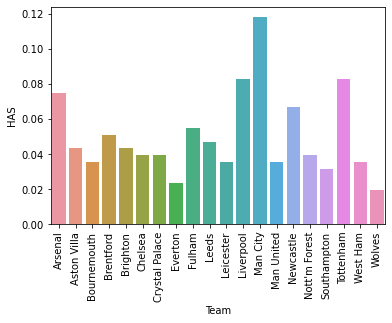

In [853]:
#visualising home attacking score
has_plot = sns.barplot(table_1.Team,table_1.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [854]:
#create a table to contain features and to train the models on. 
feature_table = df1[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_1[table_1['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_1[table_1['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_1[table_1['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_1[table_1['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table.head(20)

C:\Users\ninad\AppData\Local\Temp/ipykernel_12372/3715309528.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_table['HAS'] = f_HAS
C:\Users\ninad\AppData\Local\Temp/ipykernel_12372/3715309528.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_table['HDS'] = f_HDS
C:\Users\ninad\AppData\Local\Temp/ipykernel_12372/3715309528.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748
1,Fulham,Liverpool,D,3,4,0.055118,0.078788,0.042424,0.035433
2,Bournemouth,Aston Villa,H,3,2,0.035433,0.048485,0.030303,0.062992
3,Leeds,Wolves,H,4,6,0.047244,0.054545,0.018182,0.043307
4,Newcastle,Nott'm Forest,H,10,0,0.066929,0.030303,0.006061,0.074803
5,Tottenham,Southampton,H,8,2,0.082677,0.066667,0.030303,0.059055
6,Everton,Chelsea,A,4,6,0.023622,0.036364,0.042424,0.043307
7,Leicester,Brentford,D,5,3,0.035433,0.036364,0.060606,0.070866
8,Man United,Brighton,A,5,4,0.035433,0.024242,0.072727,0.051181
9,West Ham,Man City,A,1,2,0.035433,0.060606,0.060606,0.019685


In [855]:
#function to Convert results (H,A or D) into numeric values
def transformResult(row):
    
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table

C:\Users\ninad\AppData\Local\Temp/ipykernel_12372/791526203.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)


,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748,-1
1,Fulham,Liverpool,D,3,4,0.055118,0.078788,0.042424,0.035433,0
2,Bournemouth,Aston Villa,H,3,2,0.035433,0.048485,0.030303,0.062992,1
3,Leeds,Wolves,H,4,6,0.047244,0.054545,0.018182,0.043307,1
4,Newcastle,Nott'm Forest,H,10,0,0.066929,0.030303,0.006061,0.074803,1
...,...,...,...,...,...,...,...,...,...,...
141,West Ham,Leicester,A,6,6,0.035433,0.060606,0.096970,0.074803,-1
142,Newcastle,Chelsea,H,3,2,0.066929,0.030303,0.042424,0.043307,1
143,Wolves,Arsenal,A,2,4,0.019685,0.078788,0.084848,0.015748,-1
144,Brighton,Aston Villa,A,2,2,0.043307,0.036364,0.030303,0.062992,-1


In [856]:
#define feature and target variables
# X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
# y_train = feature_table['Result']
X_train = feature_table[['HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [857]:
#import models
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [858]:
#assign models and score each one
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = KNeighborsClassifier()
clf4 = LinearSVC()


In [859]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.6        0.53333333 0.46666667 0.4        0.4        0.4
 0.57142857 0.35714286 0.28571429 0.28571429]
0.43


In [860]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.46666667 0.46666667 0.46666667 0.46666667 0.53333333 0.53333333
 0.5        0.5        0.5        0.5       ]
0.49333333333333335


In [861]:
y_pred = clf3.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.4        0.4        0.4        0.53333333 0.6        0.4
 0.5        0.42857143 0.35714286 0.64285714]
0.4661904761904762


In [862]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf4, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.46666667 0.46666667 0.46666667 0.46666667 0.53333333 0.53333333
 0.5        0.5        0.5        0.5       ]
0.49333333333333335


In [863]:
#testing models on new data, first two matches of the second half of the season
test_preds = pd.DataFrame(columns=('HomeTeam','AwayTeam','HAS','HDS','AAS','ADS'))
test_preds

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS


In [864]:
test_preds.loc[0] = ('Brentford','Tottenham',0.051181,0.042424,0.060606,0.03937)
test_preds.loc[1] = ('Southampton','Brighton',0.031496,0.072727,0.072727,0.051181)
# test_preds.loc[0] = ('Brentford','Tottenham',0,0,0.060606,0.03937,0.051181,0.042424)
test_preds

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS
0,Brentford,Tottenham,0.051181,0.042424,0.060606,0.039370
1,Southampton,Brighton,0.031496,0.072727,0.072727,0.051181


In [865]:
test = test_preds[['HAS','HDS','AAS','ADS']]
test

,HAS,HDS,AAS,ADS
0,0.051181,0.042424,0.060606,0.039370
1,0.031496,0.072727,0.072727,0.051181


In [866]:
# df3 = feature_table.copy()
# df3 = df3.set_index('HomeTeam')
# test_preds['HAS'] = df3.lookup(test_preds['HomeTeam'], test_preds['HAS'])

# test_preds
# clf4_pred = clf4.predict(test_preds[['HAS','HDS','AAS','ADS']])
clf4_pred = clf4.predict(test)
print(clf4_pred)

[1 1]


In [867]:
clf2_pred = clf2.predict(test)
print(clf2_pred)

[1 1]


In [868]:
clf3_pred = clf3.predict(test)
print(clf3_pred)

[-1 -1]


In [869]:
clf1_pred = clf1.predict(test)
print(clf1_pred)

[ 1 -1]


In [870]:
#getting arsenal data and combining into one df
arsenal_home = feature_table.loc[feature_table['HomeTeam']=='Arsenal']

In [871]:
arsenal_away = feature_table.loc[feature_table['AwayTeam']=='Arsenal']
arsenal_away


,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748,-1
25,Bournemouth,Arsenal,A,1,6,0.035433,0.048485,0.084848,0.015748,-1
59,Man United,Arsenal,H,6,3,0.035433,0.024242,0.084848,0.015748,1
65,Brentford,Arsenal,A,2,7,0.051181,0.042424,0.084848,0.015748,-1
93,Leeds,Arsenal,A,4,4,0.047244,0.054545,0.084848,0.015748,-1
112,Southampton,Arsenal,D,3,3,0.031496,0.072727,0.084848,0.015748,0
131,Chelsea,Arsenal,A,1,2,0.039370,0.036364,0.084848,0.015748,-1
143,Wolves,Arsenal,A,2,4,0.019685,0.078788,0.084848,0.015748,-1


In [872]:
arsenal_data = arsenal_home.append(arsenal_away)
arsenal_data

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
11,Arsenal,Leicester,H,7,2,0.074803,0.042424,0.096970,0.074803,1
36,Arsenal,Fulham,H,8,3,0.074803,0.042424,0.060606,0.051181,1
44,Arsenal,Aston Villa,H,9,3,0.074803,0.042424,0.030303,0.062992,1
67,Arsenal,Tottenham,H,9,3,0.074803,0.042424,0.060606,0.039370,1
84,Arsenal,Liverpool,H,7,3,0.074803,0.042424,0.042424,0.035433,1
124,Arsenal,Nott'm Forest,H,10,2,0.074803,0.042424,0.006061,0.074803,1
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748,-1
25,Bournemouth,Arsenal,A,1,6,0.035433,0.048485,0.084848,0.015748,-1
59,Man United,Arsenal,H,6,3,0.035433,0.024242,0.084848,0.015748,1
65,Brentford,Arsenal,A,2,7,0.051181,0.042424,0.084848,0.015748,-1


In [873]:
#predicting arsenal results
clf1_pred = clf1.predict(arsenal_data[['HAS','HDS','AAS','ADS']])
print(clf1_pred)
arsenal_data["prediction_rnd_for"]=clf1_pred

[ 1  1  1  1  1  1 -1 -1  1 -1 -1  0 -1 -1]


In [874]:
arsenal_data

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result,prediction_rnd_for
11,Arsenal,Leicester,H,7,2,0.074803,0.042424,0.096970,0.074803,1,1
36,Arsenal,Fulham,H,8,3,0.074803,0.042424,0.060606,0.051181,1,1
44,Arsenal,Aston Villa,H,9,3,0.074803,0.042424,0.030303,0.062992,1,1
67,Arsenal,Tottenham,H,9,3,0.074803,0.042424,0.060606,0.039370,1,1
84,Arsenal,Liverpool,H,7,3,0.074803,0.042424,0.042424,0.035433,1,1
124,Arsenal,Nott'm Forest,H,10,2,0.074803,0.042424,0.006061,0.074803,1,1
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748,-1,-1
25,Bournemouth,Arsenal,A,1,6,0.035433,0.048485,0.084848,0.015748,-1,-1
59,Man United,Arsenal,H,6,3,0.035433,0.024242,0.084848,0.015748,1,1
65,Brentford,Arsenal,A,2,7,0.051181,0.042424,0.084848,0.015748,-1,-1


In [875]:
clf2_pred = clf2.predict(arsenal_data[['HAS','HDS','AAS','ADS']])
print(clf2_pred)
arsenal_data["prediction_log_reg"]=clf2_pred

[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [876]:
clf3_pred = clf3.predict(arsenal_data[['HAS','HDS','AAS','ADS']])
print(clf3_pred)
arsenal_data["prediction_knn"]=clf3_pred

[ 1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1]


In [877]:
#comparing results predicted by different models
arsenal_data

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result,prediction_rnd_for,prediction_log_reg,prediction_knn
11,Arsenal,Leicester,H,7,2,0.074803,0.042424,0.096970,0.074803,1,1,1,1
36,Arsenal,Fulham,H,8,3,0.074803,0.042424,0.060606,0.051181,1,1,1,1
44,Arsenal,Aston Villa,H,9,3,0.074803,0.042424,0.030303,0.062992,1,1,1,1
67,Arsenal,Tottenham,H,9,3,0.074803,0.042424,0.060606,0.039370,1,1,1,1
84,Arsenal,Liverpool,H,7,3,0.074803,0.042424,0.042424,0.035433,1,1,1,1
124,Arsenal,Nott'm Forest,H,10,2,0.074803,0.042424,0.006061,0.074803,1,1,1,1
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748,-1,-1,1,-1
25,Bournemouth,Arsenal,A,1,6,0.035433,0.048485,0.084848,0.015748,-1,-1,1,-1
59,Man United,Arsenal,H,6,3,0.035433,0.024242,0.084848,0.015748,1,1,1,-1
65,Brentford,Arsenal,A,2,7,0.051181,0.042424,0.084848,0.015748,-1,-1,1,-1


In [878]:
#read in future matches (second half of the season)
df2 = pd.read_csv('C:\\Users\\ninad\\Documents\\Data-code\\Data\\football-data\\processed\\future_matches_22_23.csv')
df2.head()

,HomeTeam,AwayTeam
0,Brentford,Tottenham
1,Southampton,Brighton
2,Leicester City,Newcastle Utd
3,Crystal Palace,Fulham
4,Everton,Wolves


In [879]:
#adding stats from table_1 into the new data table df2. df2 contains second half of premier league 22/23 matches
home_stats= table_1[['Team','HAS','HDS']]
away_stats= table_1[['Team','AAS','ADS']] 

#change the names to match the names in table_1
df2.HomeTeam.replace({
    'Leicester City': "Leicester",
    'Manchester Utd': "Man United",
    'Leeds United': "Leeds",
    'Newcastle Utd': "Newcastle",
    'Manchester City': "Man City",
    "Nott'ham Forest":"Nott'm Forest"
    
}, 
inplace=True)

df2.AwayTeam.replace({
    'Leicester City': "Leicester",
    'Manchester Utd': "Man United",
    'Leeds United': "Leeds",
    'Newcastle Utd': "Newcastle",
    'Manchester City': "Man City",
    "Nott'ham Forest":"Nott'm Forest"
    
}, 
inplace=True)




In [880]:
df3 = df2.merge(home_stats,
                  left_on= 'HomeTeam',
                  right_on = 'Team',
                  how= 'left')

df4 = df3.merge(away_stats,
                  left_on= 'AwayTeam',
                  right_on = 'Team',
                  how= 'left')


In [881]:
df4 = df4.drop(["Team_x","Team_y"], axis="columns")

In [882]:
df4

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS
0,Brentford,Tottenham,0.051181,0.042424,0.060606,0.039370
1,Southampton,Brighton,0.031496,0.072727,0.072727,0.051181
2,Leicester,Newcastle,0.035433,0.036364,0.072727,0.023622
3,Crystal Palace,Fulham,0.039370,0.048485,0.060606,0.051181
4,Everton,Wolves,0.023622,0.036364,0.018182,0.043307
...,...,...,...,...,...,...
215,Everton,Bournemouth,0.023622,0.036364,0.054545,0.094488
216,Leicester,West Ham,0.035433,0.036364,0.018182,0.027559
217,Aston Villa,Brighton,0.043307,0.036364,0.072727,0.051181
218,Leeds,Tottenham,0.047244,0.054545,0.060606,0.039370


In [883]:
#predictions for df4 which has the future matches
clf1_fut_pred = clf1.predict(df4[['HAS','HDS','AAS','ADS']])
print(clf1_fut_pred)
df4["prediction_rnd_for"]=clf1_fut_pred

[ 1 -1  0 -1  1 -1  1  1  1 -1  0  1 -1  1  1  1  0 -1  1  1  0 -1 -1  1
  1  1  1  1 -1  0  1  1 -1  0  1 -1 -1  1  1 -1  1  1  1  1 -1  1  0  1
  1  0 -1  1  1  0 -1  0  0  1  1  0  1  1  1 -1 -1  1  1  1 -1  1  0  1
 -1  1  1  1  1 -1  1  0 -1 -1  1  1  1  0  0  1 -1  0  1  1  1 -1  1  1
  1 -1  0  1  1  0 -1 -1  1  1 -1 -1  1  1  1  1  0 -1  1  1  1  1  0  1
  1  1  1 -1  1  0  1  1  1 -1  0  0  1  0 -1  1  1  1  1 -1  0 -1 -1 -1
  0  0  1  1 -1  1  1  1  1  1  1  1  1  0  0  1  0  1 -1  1  1  1  1  0
  1  1  1  1  1  1  0  1  1  1 -1  1  1  1  0  1 -1 -1 -1  1 -1  1 -1 -1
  0  1  0  1 -1  1  0  1  1  1  1  1  1  1  0 -1 -1  1  1  0  1  1  1  0
  1  1 -1 -1]


In [884]:
df4

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,prediction_rnd_for
0,Brentford,Tottenham,0.051181,0.042424,0.060606,0.039370,1
1,Southampton,Brighton,0.031496,0.072727,0.072727,0.051181,-1
2,Leicester,Newcastle,0.035433,0.036364,0.072727,0.023622,0
3,Crystal Palace,Fulham,0.039370,0.048485,0.060606,0.051181,-1
4,Everton,Wolves,0.023622,0.036364,0.018182,0.043307,1
...,...,...,...,...,...,...,...
215,Everton,Bournemouth,0.023622,0.036364,0.054545,0.094488,0
216,Leicester,West Ham,0.035433,0.036364,0.018182,0.027559,1
217,Aston Villa,Brighton,0.043307,0.036364,0.072727,0.051181,1
218,Leeds,Tottenham,0.047244,0.054545,0.060606,0.039370,-1


In [885]:
#checking wins draws and loses for arsenal

# df4[(df4["HomeTeam"]=="Arsenal") & (df4["AwayTeam"]=="Arsenal")]
df4[df4["HomeTeam"]=="Arsenal"]
df4[df4["HomeTeam"]=="Arsenal"]["prediction_rnd_for"].value_counts()

1    11
Name: prediction_rnd_for, dtype: int64

In [886]:
test_1 = df4[df4["AwayTeam"]=="Arsenal"]["prediction_rnd_for"].value_counts()
test_1
# df4[df4["AwayTeam"]=="Arsenal"]

-1    9
 1    2
Name: prediction_rnd_for, dtype: int64

In [887]:
#checking results for man city and chelsea
df4[df4["HomeTeam"]=="Man City"]

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,prediction_rnd_for
15,Man City,Everton,0.11811,0.054545,0.030303,0.043307,1
42,Man City,Wolves,0.11811,0.054545,0.018182,0.043307,1
61,Man City,Aston Villa,0.11811,0.054545,0.030303,0.062992,1
96,Man City,Newcastle,0.11811,0.054545,0.072727,0.023622,1
119,Man City,West Ham,0.11811,0.054545,0.018182,0.027559,1
122,Man City,Liverpool,0.11811,0.054545,0.042424,0.035433,1
147,Man City,Leicester,0.11811,0.054545,0.096970,0.074803,1
169,Man City,Arsenal,0.11811,0.054545,0.084848,0.015748,1
185,Man City,Leeds,0.11811,0.054545,0.060606,0.066929,-1
203,Man City,Chelsea,0.11811,0.054545,0.042424,0.043307,1


In [888]:
df4[df4["AwayTeam"]=="Man City"]

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,prediction_rnd_for
9,Leeds,Man City,0.047244,0.054545,0.060606,0.019685,-1
29,Chelsea,Man City,0.039370,0.036364,0.060606,0.019685,0
31,Man United,Man City,0.035433,0.024242,0.060606,0.019685,1
54,Tottenham,Man City,0.082677,0.066667,0.060606,0.019685,-1
72,Nott'm Forest,Man City,0.039370,0.066667,0.060606,0.019685,-1
88,Bournemouth,Man City,0.035433,0.048485,0.060606,0.019685,-1
107,Crystal Palace,Man City,0.039370,0.048485,0.060606,0.019685,-1
139,Southampton,Man City,0.031496,0.072727,0.060606,0.019685,-1
157,Brighton,Man City,0.043307,0.036364,0.060606,0.019685,0
178,Fulham,Man City,0.055118,0.078788,0.060606,0.019685,-1


In [889]:
df4[df4["HomeTeam"]=="Chelsea"]

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,prediction_rnd_for
7,Chelsea,Bournemouth,0.03937,0.036364,0.054545,0.094488,1
29,Chelsea,Man City,0.03937,0.036364,0.060606,0.019685,0
34,Chelsea,Crystal Palace,0.03937,0.036364,0.030303,0.039370,1
55,Chelsea,Fulham,0.03937,0.036364,0.060606,0.051181,0
73,Chelsea,Southampton,0.03937,0.036364,0.030303,0.059055,1
94,Chelsea,Leeds,0.03937,0.036364,0.060606,0.066929,1
116,Chelsea,Everton,0.03937,0.036364,0.030303,0.043307,1
124,Chelsea,Aston Villa,0.03937,0.036364,0.030303,0.062992,1
140,Chelsea,Brighton,0.03937,0.036364,0.072727,0.051181,0
167,Chelsea,Brentford,0.03937,0.036364,0.060606,0.070866,0


In [890]:
#read in an elo ratings table to account for "level" of each team 
elo_rating_table = pd.read_csv('C:\\Users\\ninad\\Documents\\Data-code\\Data\\football-data\\processed\\Elo_ratings.csv')
elo_rating_table

,Team,Rating
0,Man City,2030
1,Liverpool,2000
2,Arsenal,1921
3,Chelsea,1881
4,Tottenham,1876
5,Man United,1850
6,Newcastle,1842
7,Brighton,1791
8,Leicester,1786
9,West Ham,1768


In [920]:
elo_rating_table.Team.replace({
    "Forest": "Nott'm Forest"},
    inplace=True)

In [921]:
#adding elo ratings to the future matches table
df5 = df4.merge(elo_rating_table,
                  left_on= 'HomeTeam',
                  right_on = 'Team',
                  how= 'left')

In [922]:
df5.rename(columns = {'Rating':"Home_Rating"}, inplace = True)
# df5 = df5.drop(["prediction_rnd_for"],axis="columns")
df5

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,prediction_rnd_for,Team,Home_Rating
0,Brentford,Tottenham,0.051181,0.042424,0.060606,0.039370,1,Brentford,1739
1,Southampton,Brighton,0.031496,0.072727,0.072727,0.051181,-1,Southampton,1673
2,Leicester,Newcastle,0.035433,0.036364,0.072727,0.023622,0,Leicester,1786
3,Crystal Palace,Fulham,0.039370,0.048485,0.060606,0.051181,-1,Crystal Palace,1764
4,Everton,Wolves,0.023622,0.036364,0.018182,0.043307,1,Everton,1698
...,...,...,...,...,...,...,...,...,...
215,Everton,Bournemouth,0.023622,0.036364,0.054545,0.094488,0,Everton,1698
216,Leicester,West Ham,0.035433,0.036364,0.018182,0.027559,1,Leicester,1786
217,Aston Villa,Brighton,0.043307,0.036364,0.072727,0.051181,1,Aston Villa,1744
218,Leeds,Tottenham,0.047244,0.054545,0.060606,0.039370,-1,Leeds,1711


In [923]:
df6 = df5.merge(elo_rating_table,
                  left_on= 'AwayTeam',
                  right_on = 'Team',
                  how= 'left')


In [924]:
df6.rename(columns={"Rating":"Away_Rating"}, inplace=True)

In [925]:
df6 = df6.drop(columns=["prediction_rnd_for","Team_x","Team_y"])

In [926]:
df6

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,Home_Rating,Away_Rating
0,Brentford,Tottenham,0.051181,0.042424,0.060606,0.039370,1739,1876
1,Southampton,Brighton,0.031496,0.072727,0.072727,0.051181,1673,1791
2,Leicester,Newcastle,0.035433,0.036364,0.072727,0.023622,1786,1842
3,Crystal Palace,Fulham,0.039370,0.048485,0.060606,0.051181,1764,1680
4,Everton,Wolves,0.023622,0.036364,0.018182,0.043307,1698,1682
...,...,...,...,...,...,...,...,...
215,Everton,Bournemouth,0.023622,0.036364,0.054545,0.094488,1698,1660
216,Leicester,West Ham,0.035433,0.036364,0.018182,0.027559,1786,1768
217,Aston Villa,Brighton,0.043307,0.036364,0.072727,0.051181,1744,1791
218,Leeds,Tottenham,0.047244,0.054545,0.060606,0.039370,1711,1876


In [933]:
#retrain feature table with elo this time
#merge with elo ratings table, first get home rating
feature_table_w_elo = feature_table.merge(elo_rating_table,
                                         left_on="HomeTeam",
                                         right_on = 'Team',
                                          how= 'left')
feature_table_w_elo.rename(columns={"Rating":"Home_Rating"}, inplace=True)
feature_table_w_elo = feature_table_w_elo.drop(columns=["Team"]) 
feature_table_w_elo

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result,Home_Rating
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748,-1,1764
1,Fulham,Liverpool,D,3,4,0.055118,0.078788,0.042424,0.035433,0,1680
2,Bournemouth,Aston Villa,H,3,2,0.035433,0.048485,0.030303,0.062992,1,1660
3,Leeds,Wolves,H,4,6,0.047244,0.054545,0.018182,0.043307,1,1711
4,Newcastle,Nott'm Forest,H,10,0,0.066929,0.030303,0.006061,0.074803,1,1842
...,...,...,...,...,...,...,...,...,...,...,...
141,West Ham,Leicester,A,6,6,0.035433,0.060606,0.096970,0.074803,-1,1768
142,Newcastle,Chelsea,H,3,2,0.066929,0.030303,0.042424,0.043307,1,1842
143,Wolves,Arsenal,A,2,4,0.019685,0.078788,0.084848,0.015748,-1,1682
144,Brighton,Aston Villa,A,2,2,0.043307,0.036364,0.030303,0.062992,-1,1791


In [934]:
#get away rating
feature_table_w_elo = feature_table_w_elo.merge(elo_rating_table,
                                         left_on="AwayTeam",
                                         right_on = 'Team',
                                          how= 'left')


In [936]:
feature_table_w_elo = feature_table_w_elo.drop(columns=["Team"], axis="columns") 

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result,Home_Rating,Rating
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748,-1,1764,1921
1,Fulham,Liverpool,D,3,4,0.055118,0.078788,0.042424,0.035433,0,1680,2000
2,Bournemouth,Aston Villa,H,3,2,0.035433,0.048485,0.030303,0.062992,1,1660,1744
3,Leeds,Wolves,H,4,6,0.047244,0.054545,0.018182,0.043307,1,1711,1682
4,Newcastle,Nott'm Forest,H,10,0,0.066929,0.030303,0.006061,0.074803,1,1842,1630
...,...,...,...,...,...,...,...,...,...,...,...,...
141,West Ham,Leicester,A,6,6,0.035433,0.060606,0.096970,0.074803,-1,1768,1786
142,Newcastle,Chelsea,H,3,2,0.066929,0.030303,0.042424,0.043307,1,1842,1881
143,Wolves,Arsenal,A,2,4,0.019685,0.078788,0.084848,0.015748,-1,1682,1921
144,Brighton,Aston Villa,A,2,2,0.043307,0.036364,0.030303,0.062992,-1,1791,1744


In [938]:
feature_table_w_elo.rename(columns={"Rating":"Away_Rating"}, inplace=True)
feature_table_w_elo

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result,Home_Rating,Away_Rating
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748,-1,1764,1921
1,Fulham,Liverpool,D,3,4,0.055118,0.078788,0.042424,0.035433,0,1680,2000
2,Bournemouth,Aston Villa,H,3,2,0.035433,0.048485,0.030303,0.062992,1,1660,1744
3,Leeds,Wolves,H,4,6,0.047244,0.054545,0.018182,0.043307,1,1711,1682
4,Newcastle,Nott'm Forest,H,10,0,0.066929,0.030303,0.006061,0.074803,1,1842,1630
...,...,...,...,...,...,...,...,...,...,...,...,...
141,West Ham,Leicester,A,6,6,0.035433,0.060606,0.096970,0.074803,-1,1768,1786
142,Newcastle,Chelsea,H,3,2,0.066929,0.030303,0.042424,0.043307,1,1842,1881
143,Wolves,Arsenal,A,2,4,0.019685,0.078788,0.084848,0.015748,-1,1682,1921
144,Brighton,Aston Villa,A,2,2,0.043307,0.036364,0.030303,0.062992,-1,1791,1744


In [898]:
#####ignore
# feature_table_w_elo=feature_table_w_elo.drop(["Team"], axis="columns")
# feature_table_w_elo.rename(columns={"Rating":"Away_Rating"}, inplace=True)
# feature_table_w_elo.rename(columns={"Rating":"Home_Rating"}, inplace=True)
# feature_table_w_elo = feature_table_w_elo.merge(elo_rating_table,
#                                          left_on="AwayTeam",
#                                          right_on = 'Team',
#                                           how= 'left')


In [939]:
# modify feature table and prep for training
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0
feature_table_w_elo["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table_w_elo

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result,Home_Rating,Away_Rating
0,Crystal Palace,Arsenal,A,2,2,0.039370,0.048485,0.084848,0.015748,-1,1764,1921
1,Fulham,Liverpool,D,3,4,0.055118,0.078788,0.042424,0.035433,0,1680,2000
2,Bournemouth,Aston Villa,H,3,2,0.035433,0.048485,0.030303,0.062992,1,1660,1744
3,Leeds,Wolves,H,4,6,0.047244,0.054545,0.018182,0.043307,1,1711,1682
4,Newcastle,Nott'm Forest,H,10,0,0.066929,0.030303,0.006061,0.074803,1,1842,1630
...,...,...,...,...,...,...,...,...,...,...,...,...
141,West Ham,Leicester,A,6,6,0.035433,0.060606,0.096970,0.074803,-1,1768,1786
142,Newcastle,Chelsea,H,3,2,0.066929,0.030303,0.042424,0.043307,1,1842,1881
143,Wolves,Arsenal,A,2,4,0.019685,0.078788,0.084848,0.015748,-1,1682,1921
144,Brighton,Aston Villa,A,2,2,0.043307,0.036364,0.030303,0.062992,-1,1791,1744


In [940]:
# specify features and target again then retrain
X_elo_train = feature_table_w_elo[['HAS','HDS','AAS','ADS','Home_Rating','Away_Rating']]
y_elo_train = feature_table_w_elo['Result']

In [941]:
y_elo_pred = clf1.fit(X_elo_train,y_elo_train).predict(X_elo_train)
accuracy_score(y_elo_pred,y_elo_train)
scores_elo = cross_val_score(clf1, X_elo_train, y_elo_train, cv=10)
print(scores_elo)
print(scores_elo.mean())

[0.53333333 0.53333333 0.46666667 0.53333333 0.53333333 0.53333333
 0.57142857 0.35714286 0.35714286 0.35714286]
0.4776190476190475


In [942]:
clf1_fut_elo_pred = clf1.predict(df6[['HAS','HDS','AAS','ADS','Home_Rating','Away_Rating']])
print(clf1_fut_elo_pred)
df6["prediction_rnd_for"]=clf1_fut_elo_pred

[ 0 -1  0  1  1  0  1  1  1 -1  0  1 -1  1  1  1  1 -1  1  1  0  1 -1  1
  1  0  1  1 -1 -1  1  1  1  0  1  1  1  1  1 -1  1  0  1  0 -1  1 -1  1
  1 -1 -1  1  1  0 -1  1  0  1  0  1 -1  1  1 -1 -1  1  0  1 -1  1  1  1
 -1  1  1  1  1 -1  1  0 -1  1  1 -1  1  1  0  1 -1  1  1  1  0 -1  1  1
  1 -1 -1  1  1  0  1 -1  1  1 -1 -1  1  1  1  1  0 -1  1  1  1  1 -1  1
  1  1  1  1  1 -1  1  1  1 -1  0  1  1  0  0  1  1  1  1 -1  0 -1 -1  0
  0  0  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  0  1 -1  1  1 -1  1  1
 -1  1  1  0  1  1  0  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1
  0  1  0  1 -1  1 -1  1  1  1  1  1  1  1  0 -1 -1  0  1  0  1  1  1  1
  1  1 -1 -1]


In [943]:
#check results for a few teams
df6[(df6["HomeTeam"]=="Man City") | (df6["AwayTeam"]=="Man City")]

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,Home_Rating,Away_Rating,prediction_rnd_for
9,Leeds,Man City,0.047244,0.054545,0.060606,0.019685,1711,2030,-1
15,Man City,Everton,0.118110,0.054545,0.030303,0.043307,2030,1698,1
29,Chelsea,Man City,0.039370,0.036364,0.060606,0.019685,1881,2030,-1
31,Man United,Man City,0.035433,0.024242,0.060606,0.019685,1850,2030,1
42,Man City,Wolves,0.118110,0.054545,0.018182,0.043307,2030,1682,1
54,Tottenham,Man City,0.082677,0.066667,0.060606,0.019685,1876,2030,-1
61,Man City,Aston Villa,0.118110,0.054545,0.030303,0.062992,2030,1744,1
72,Nott'm Forest,Man City,0.039370,0.066667,0.060606,0.019685,1630,2030,-1
88,Bournemouth,Man City,0.035433,0.048485,0.060606,0.019685,1660,2030,-1
96,Man City,Newcastle,0.118110,0.054545,0.072727,0.023622,2030,1842,1


In [944]:
df6[(df6["HomeTeam"]=="Man United") & ((df6["prediction_rnd_for"]==1) | (df6["prediction_rnd_for"]==0))]

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,Home_Rating,Away_Rating,prediction_rnd_for
8,Man United,Nott'm Forest,0.035433,0.024242,0.006061,0.074803,1850,1630,1
23,Man United,Bournemouth,0.035433,0.024242,0.054545,0.094488,1850,1660,1
31,Man United,Man City,0.035433,0.024242,0.060606,0.019685,1850,2030,1
57,Man United,Crystal Palace,0.035433,0.024242,0.030303,0.039370,1850,1764,1
76,Man United,Leicester,0.035433,0.024242,0.096970,0.074803,1850,1786,1
89,Man United,Brentford,0.035433,0.024242,0.060606,0.070866,1850,1739,1
102,Man United,Southampton,0.035433,0.024242,0.030303,0.059055,1850,1673,1
137,Man United,Everton,0.035433,0.024242,0.030303,0.043307,1850,1698,1
156,Man United,Chelsea,0.035433,0.024242,0.042424,0.043307,1850,1881,1
170,Man United,Aston Villa,0.035433,0.024242,0.030303,0.062992,1850,1744,1


In [945]:
# team = "Wolves"
# wins = df6[(df6["HomeTeam"]==team) & (df6["prediction_rnd_for"]==1)]["prediction_rnd_for"].value_counts()
# wins = int(wins)*3

In [946]:
# draws = df6[(df6["HomeTeam"]=="Arsenal") & (df6["prediction_rnd_for"]==0)]["prediction_rnd_for"].value_counts()
# # draws = int(draws)*1
# draws[:]

Series([], Name: prediction_rnd_for, dtype: int64)

In [947]:
# points = wins + draws
# points

Series([], Name: prediction_rnd_for, dtype: int64)

In [948]:
#list of all teams
teams_list = list(table_1["Team"].unique())

In [949]:
# for all teams count how many points gained (i.e. 3 per win and 1 per draw) and total them up
Team = []
Points = []
for team in teams_list:
    Team.append(team)
    wins_h = df6[(df6["HomeTeam"]==team) & (df6["prediction_rnd_for"]==1)]["prediction_rnd_for"].value_counts()
    wins_h = int(wins_h)*3
    wins_a = df6[(df6["AwayTeam"]==team) & (df6["prediction_rnd_for"]==-1)]["prediction_rnd_for"].value_counts()
    try:
        wins_a = int(wins_a)*3
    except TypeError:
        wins_a = 0
    draws_h = df6[(df6["HomeTeam"]==team) & (df6["prediction_rnd_for"]==0)]["prediction_rnd_for"].value_counts()
    try:
        draws_h = int(draws_h)*1
    except TypeError:
        draws_h=0
    draws_a = df6[(df6["HomeTeam"]==team) & (df6["prediction_rnd_for"]==0)]["prediction_rnd_for"].value_counts()
    try:
        draws_a = int(draws_a)*1
    except TypeError:
        draws_a=0
    points = wins_h + wins_a + draws_h + draws_a
    Points.append(points)


In [953]:
#create a table to showcase the table standings for the second half of the season
second_half_of_season = pd.DataFrame(columns=["Team","Points"])
second_half_of_season["Team"] = Team
second_half_of_season["Points"] = Points
second_half_of_season.sort_values("Points", ascending=False)

,Team,Points
0,Arsenal,60
12,Man City,60
17,Tottenham,51
13,Man United,48
14,Newcastle,42
5,Chelsea,40
4,Brighton,38
11,Liverpool,33
3,Brentford,30
8,Fulham,27


In [954]:
#import current league standings 
league_standings = pd.read_csv('C:\\Users\\ninad\\Documents\\Data-code\\Data\\football-data\\processed\\premierleague_halfway_standings.csv')

In [955]:
league_standings

,Team,P
0,Arsenal,37
1,Man City,32
2,Newcastle,30
3,Tottenham,29
4,Man United,26
5,Liverpool,22
6,Brighton,21
7,Chelsea,21
8,Fulham,19
9,Brentford,19


In [957]:
# combine both tables to showcase the final predicted table of the 22/23 premier league season
final_league_table = league_standings.merge(second_half_of_season,
                  left_on= 'Team',
                  right_on = 'Team',
                  how= 'left')
final_league_table["total points"] = final_league_table.iloc[:,1:].sum(axis=1)
final_league_table = final_league_table.drop(columns=["P", "Points"])

In [959]:
final_league_table = final_league_table.sort_values("total points", ascending=False)
final_league_table

,Team,total points
0,Arsenal,97
1,Man City,92
3,Tottenham,80
4,Man United,74
2,Newcastle,72
7,Chelsea,61
6,Brighton,59
5,Liverpool,55
9,Brentford,49
8,Fulham,46
